In [8]:
""" Test linear mcx with ancilla """

from unittest import TestCase

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import Operator
from mcx import McxVchainDirty, LinearMcx
from qclib.gates.mcx import McxVchainDirty as VchainOld

In [13]:
def _multiple_mcx(nt):
        nc=2
        circ = QuantumCircuit(nc+nt)
        controls = list(np.arange(nc))
        for i in range(nt):
            circ.mcx(controls, [nc+i])
        return circ


for nt in range(1, 8):
    circ1= McxVchainDirty.toffoli_multi_target(nt)
    circ2 = _multiple_mcx(nt)
    r1 = Operator(circ1).data
    r2 = Operator(circ2).data
    print(np.allclose(r1, r2))

True
True
True
True
True
True
True


In [10]:
# mcx_v_chain_circuit
num_controls = 4
num_target_qubit = 3
mcx_v_chain_circuit = McxVchainDirty(
    num_controls, num_target_qubit=num_target_qubit
).definition

# mcx_v_chain_circuit_old
num_controls = 4
num_target_qubit = 3
old_v_chain_circuit = VchainOld(
    num_controls, num_target_qubit=num_target_qubit
).definition

# qiskit_circuit
qiskit_circuit = QuantumCircuit(9)
controls_idx = list(np.arange(4))
for target_idx in range(6, 9):
    qiskit_circuit.mcx(controls_idx, [target_idx])


mcx_v_chain_op = Operator(mcx_v_chain_circuit).data
old_v_chain_op = Operator(old_v_chain_circuit).data
qiskit_mcx_op = Operator(qiskit_circuit).data

print(np.allclose(mcx_v_chain_op, old_v_chain_op))

False


In [11]:
print(VchainOld.toffoli_multi_target(8, side='l'))

                                             
q_0: ─────────────────────────────────────■──
                                          │  
q_1: ─────────────────────────────────────■──
                                        ┌─┴─┐
q_2: ────────────────────────────────■──┤ X ├
                                   ┌─┴─┐└───┘
q_3: ───────────────────────────■──┤ X ├─────
                              ┌─┴─┐└───┘     
q_4: ──────────────────────■──┤ X ├──────────
                         ┌─┴─┐└───┘          
q_5: ─────────────────■──┤ X ├───────────────
                    ┌─┴─┐└───┘               
q_6: ────────────■──┤ X ├────────────────────
               ┌─┴─┐└───┘                    
q_7: ───────■──┤ X ├─────────────────────────
          ┌─┴─┐└───┘                         
q_8: ──■──┤ X ├──────────────────────────────
     ┌─┴─┐└───┘                              
q_9: ┤ X ├───────────────────────────────────
     └───┘                                   


In [2]:
print(McxVchainDirty.toffoli_multi_target(8, side='l'))

                                             
q_0: ─────────────────────────────────────■──
                                          │  
q_1: ─────────────────────────────────────■──
                                        ┌─┴─┐
q_2: ─────────────────■─────────■────■──┤ X ├
                      │         │  ┌─┴─┐└───┘
q_3: ────────────■────┼────■────┼──┤ X ├─────
                 │    │    │  ┌─┴─┐└───┘     
q_4: ───────■────┼────┼────┼──┤ X ├──────────
            │    │    │  ┌─┴─┐└───┘          
q_5: ──■────┼────┼────┼──┤ X ├───────────────
       │    │    │  ┌─┴─┐└───┘               
q_6: ──┼────┼────┼──┤ X ├────────────────────
       │    │  ┌─┴─┐└───┘                    
q_7: ──┼────┼──┤ X ├─────────────────────────
       │  ┌─┴─┐└───┘                         
q_8: ──┼──┤ X ├──────────────────────────────
     ┌─┴─┐└───┘                              
q_9: ┤ X ├───────────────────────────────────
     └───┘                                   


In [3]:
print(McxVchainDirty.toffoli_multi_target(8, side='r'))

                                             
q_0: ──■─────────────────────────────────────
       │                                     
q_1: ──■────■────■─────────■─────────────────
     ┌─┴─┐┌─┴─┐  │         │                 
q_2: ┤ X ├┤ X ├──┼────■────┼────■────────────
     └───┘└───┘┌─┴─┐  │    │    │            
q_3: ──────────┤ X ├──┼────┼────┼────■───────
               └───┘┌─┴─┐  │    │    │       
q_4: ───────────────┤ X ├──┼────┼────┼────■──
                    └───┘┌─┴─┐  │    │    │  
q_5: ────────────────────┤ X ├──┼────┼────┼──
                         └───┘┌─┴─┐  │    │  
q_6: ─────────────────────────┤ X ├──┼────┼──
                              └───┘┌─┴─┐  │  
q_7: ──────────────────────────────┤ X ├──┼──
                                   └───┘┌─┴─┐
q_8: ───────────────────────────────────┤ X ├
                                        └───┘
q_9: ────────────────────────────────────────
                                             


In [4]:
# mcx_v_chain_circuit
num_controls = 4
num_target_qubit = 3
mcx_v_chain_circuit = McxVchainDirty(
    num_controls, num_target_qubit=num_target_qubit
).definition
mcx_v_chain_circuit.draw()

┌──────────┐                           »
q6_0: ──────────────────────────┤0         ├───────────────────────────»
                                │          │                           »
q6_1: ──────────────────────────┤1         ├───────────────────────────»
                    ┌──────────┐│          │┌──────────┐               »
q6_2: ──────────────┤0         ├┤  Toffoli ├┤0         ├───────────────»
      ┌────────────┐│          ││          ││          │┌─────────────┐»
q6_3: ┤0           ├┤          ├┤          ├┤          ├┤0            ├»
      │            ││  Toffoli ││          ││  Toffoli ││             │»
q8_0: ┤            ├┤1         ├┤2         ├┤1         ├┤             ├»
      │            ││          │└──────────┘│          ││             │»
q8_1: ┤1           ├┤2         ├────────────┤2         ├┤1            ├»
      │  toff_left │└──────────┘            └──────────┘│  toff_right │»
q7_0: ┤2           ├────────────────────────────────────┤2            ├»
      │            │                                    │             │»
q7_1: ┤3           ├────────────────────────────────────┤3            ├»
      │            │                                    │             │»
q7_2: ┤4           ├────────────────────────────────────┤4            ├»
      └────────────┘                                    └─────────────┘»
«                  ┌──────────┐            
«q6_0: ────────────┤0         ├────────────
«                  │          │            
«q6_1: ────────────┤1         ├────────────
«      ┌──────────┐│          │┌──────────┐
«q6_2: ┤0         ├┤  Toffoli ├┤0         ├
«      │          ││          ││          │
«q6_3: ┤          ├┤          ├┤          ├
«      │  Toffoli ││          ││  Toffoli │
«q8_0: ┤1         ├┤2         ├┤1         ├
«      │          │└──────────┘│          │
«q8_1: ┤2         ├────────────┤2         ├
«      └──────────┘            └──────────┘
«q7_0: ────────────────────────────────────
«                                          
«q7_1: ────────────────────────────────────
«                                          
«q7_2: ────────────────────────────────────
«

In [6]:
# mcx_v_chain_circuit
num_controls = 4
num_target_qubit = 3
mcx_v_chain_circuit = McxVchainDirty(
    num_controls, num_target_qubit=num_target_qubit
).definition
mcx_v_chain_circuit.decompose().draw()

»
q12_0: ──────────────────────────────────────────────────────────────────────»
                                                                             »
q12_1: ──────────────────────────────────────────────────────────────────────»
                                                                             »
q12_2: ────────────────────────────────■─────────────────────────────────────»
                                       │                                     »
q12_3: ────────────■───────────────────┼─────────────────────────────────────»
                   │                   │                      ┌─────────────┐»
q14_0: ────────────┼───────────────────┼───────────────────■──┤ U(-π/4,0,0) ├»
                   │  ┌─────────────┐┌─┴─┐┌─────────────┐┌─┴─┐└─────────────┘»
q14_1: ────────────■──┤ U(-π/4,0,0) ├┤ X ├┤ U(-π/4,0,0) ├┤ X ├───────────────»
                 ┌─┴─┐└─────────────┘└───┘└─────────────┘└───┘               »
q13_0: ───────■──┤ X ├───────────────────────────────────────────────────────»
            ┌─┴─┐└───┘                                                       »
q13_1: ──■──┤ X ├────────────────────────────────────────────────────────────»
       ┌─┴─┐└───┘                                                            »
q13_2: ┤ X ├─────────────────────────────────────────────────────────────────»
       └───┘                                                                 »
«                                                                      »
«q12_0: ──■──────────────────────────────────────■─────────────────────»
«         │                                      │                     »
«q12_1: ──┼───────────────────■──────────────────┼─────────────────────»
«         │                   │                  │                     »
«q12_2: ──┼───────────────────┼──────────────────┼─────────────────────»
«         │                   │                  │                     »
«q12_3: ──┼───────────────────┼──────────────────┼─────────────────────»
«       ┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐┌────────────┐     »
«q14_0: ┤ X ├┤ U(-π/4,0,0) ├┤ X ├┤ U(π/4,0,0) ├┤ X ├┤ U(π/4,0,0) ├──■──»
«       └───┘└─────────────┘└───┘└────────────┘└───┘└────────────┘┌─┴─┐»
«q14_1: ──────────────────────────────────────────────────────────┤ X ├»
«                                                                 └───┘»
«q13_0: ───────────────────────────────────────────────────────────────»
«                                                                      »
«q13_1: ───────────────────────────────────────────────────────────────»
«                                                                      »
«q13_2: ───────────────────────────────────────────────────────────────»
«                                                                      »
«                                                                 »
«q12_0: ──────────────────────────────────────────────────────────»
«                                                                 »
«q12_1: ──────────────────────────────────────────────────────────»
«                                                                 »
«q12_2: ────────────────■──────────────────────────────────────■──»
«                       │                                      │  »
«q12_3: ────────────────┼──────────────────■───────────────────┼──»
«                       │                  │                   │  »
«q14_0: ────────────────┼──────────────────┼───────────────────┼──»
«       ┌────────────┐┌─┴─┐┌────────────┐  │  ┌─────────────┐┌─┴─┐»
«q14_1: ┤ U(π/4,0,0) ├┤ X ├┤ U(π/4,0,0) ├──■──┤ U(-π/4,0,0) ├┤ X ├»
«       └────────────┘└───┘└────────────┘┌─┴─┐└─────────────┘└───┘»
«q13_0: ─────────────────────────────────┤ X ├───────■────────────»
«                                        └───┘     ┌─┴─┐          »
«q13_1: ───────────────────────────────────────────┤ X ├───────■──»
«                                                  └───┘     ┌─┴─┐»
«q13_2: ─────────────────────────

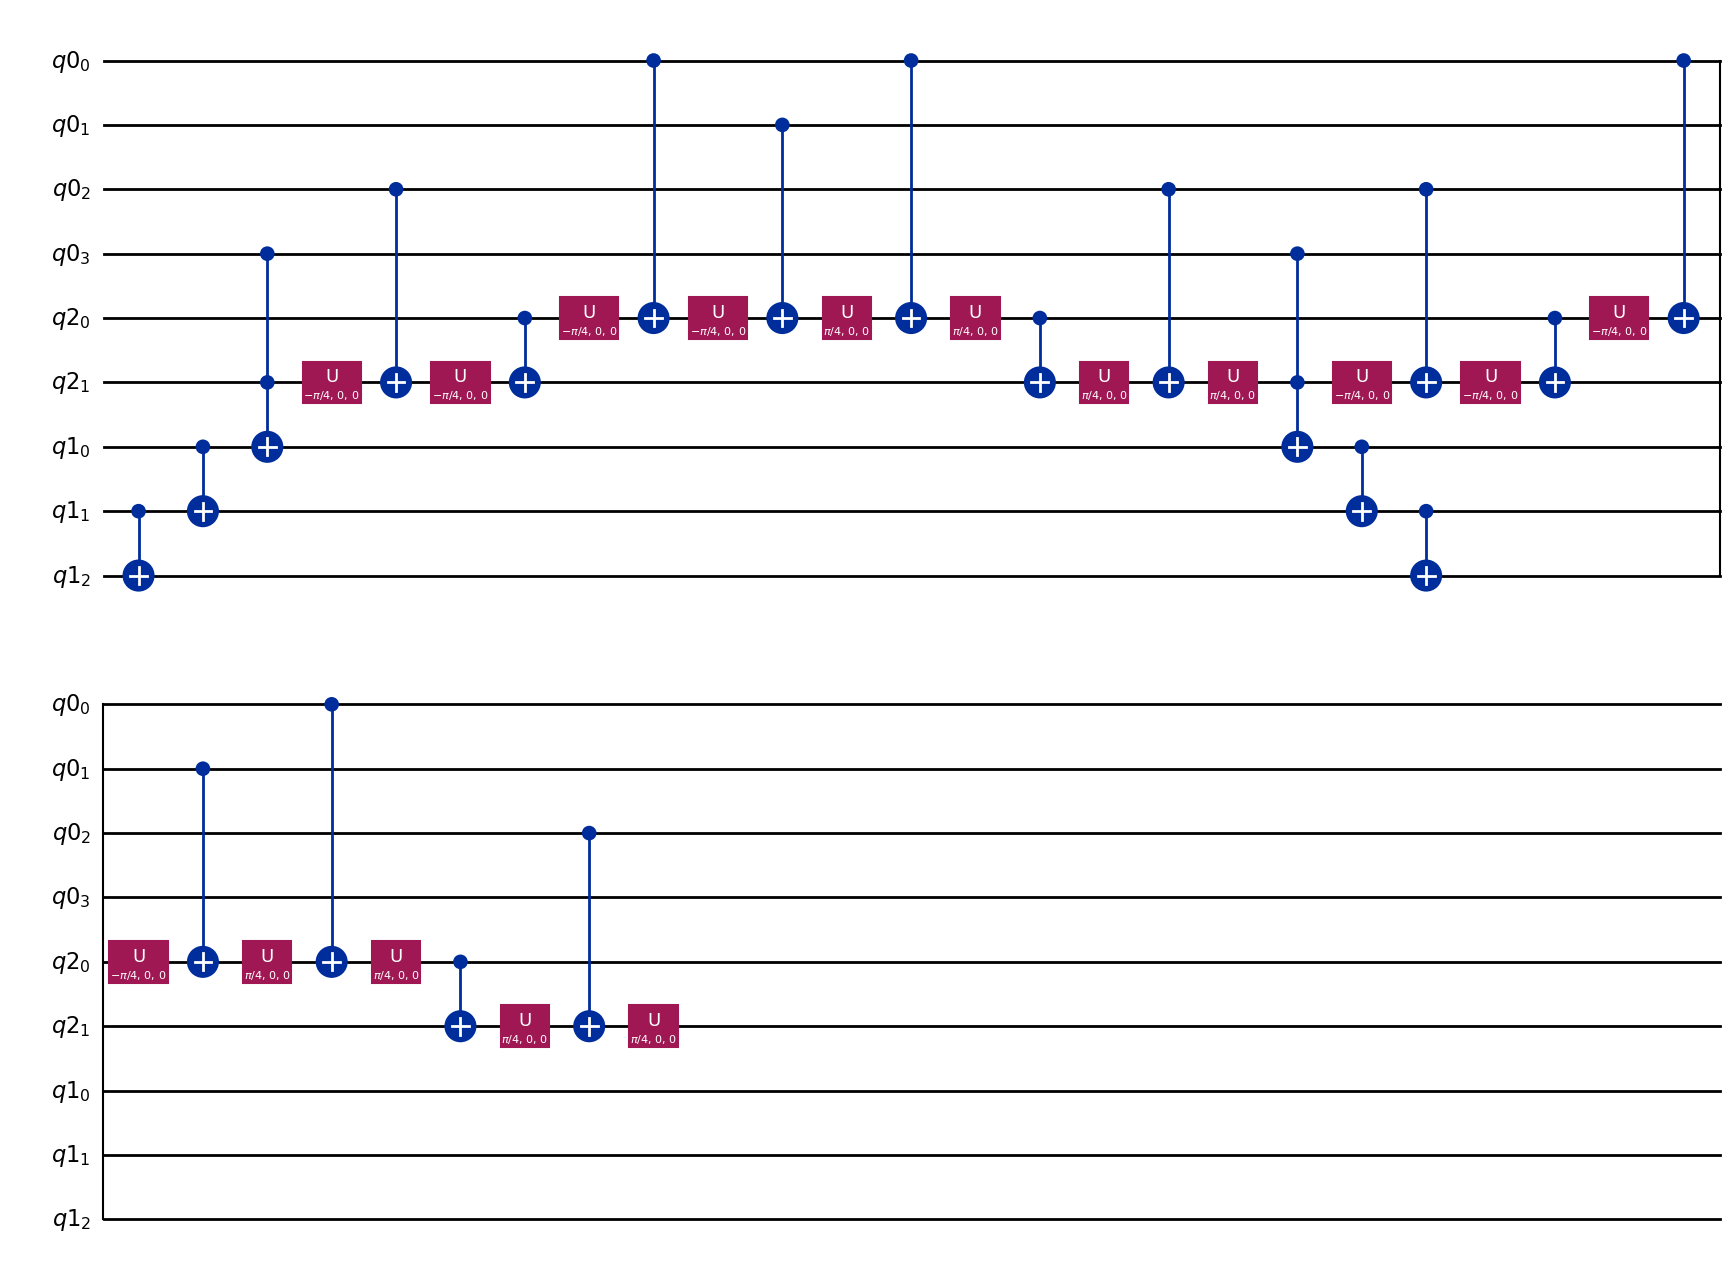

In [2]:
# mcx_v_chain_circuit
num_controls = 4
num_target_qubit = 3
mcx_v_chain_circuit = McxVchainDirty(
    num_controls, num_target_qubit=num_target_qubit
).definition
mcx_v_chain_circuit.decompose().draw('mpl')

                                        
q_0: ────────────────────────────────■──
                                     │  
q_1: ──■──────────────■─────────■────■──
       │              │       ┌─┴─┐┌─┴─┐
q_2: ──┼────■─────────┼────■──┤ X ├┤ X ├
       │    │       ┌─┴─┐  │  └───┘└───┘
q_3: ──┼────┼────■──┤ X ├──┼────────────
       │    │    │  └───┘┌─┴─┐          
q_4: ──┼────┼────┼────■──┤ X ├──────────
     ┌─┴─┐  │    │    │  └───┘          
q_5: ┤ X ├──┼────┼────┼─────────────────
     └───┘┌─┴─┐  │    │                 
q_6: ─────┤ X ├──┼────┼─────────────────
          └───┘┌─┴─┐  │                 
q_7: ──────────┤ X ├──┼─────────────────
               └───┘┌─┴─┐               
q_8: ───────────────┤ X ├───────────────
                    └───┘               
q_9: ───────────────────────────────────
                                        
